In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

Task#01

In [ ]:
# I wish to directly input image, whose dimensions can autmoatically be created, to formulate corresponding noise
def noise(noise_typ,row,col):
   if noise_typ == "uniform":
      min=0
      max=255
      uniform=np.random.uniform(min,max,row*col)
      unif = uniform.reshape(row,col)
      noise= unif
      noise=(noise*255).astype(np.uint8)
      return noise
   elif noise_typ == "gaussian":
      mean = 0                        # mean of noise
      var = 0.01
      sigma = var**0.5                # standard deviation of noise
      gaussian = np.random.normal(mean,sigma,(row,col))
      gauss = gaussian.reshape(row,col)
      noise = gauss
      noise=(noise*255).astype(np.uint8)
      return noise
   else:
      print("Error: Only uniform or gaussian attribute is allowed")

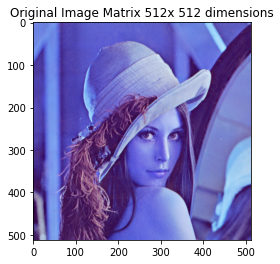

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.bmp')# My reference Image
row,col,ch= image.shape
plt.title("Original Image Matrix %1.0f" %row + "x %1.0f" %col+" dimensions" )
plt.imshow(image)

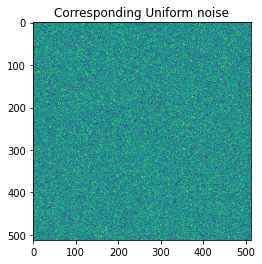

In [ ]:
plt.title('Corresponding Uniform noise')
im_uni_noised=noise("uniform",row,col)
plt.imshow(im_uni_noised)

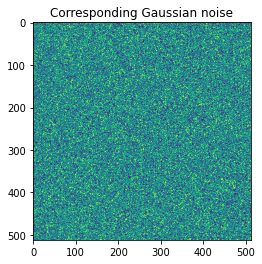

In [ ]:
plt.title('Corresponding Gaussian noise')
im_gauss_noised=noise("gaussian",row,col)
plt.imshow(im_gauss_noised)

Task#02

In [ ]:

def gauss_noise_adder(image):
      row,col,ch= image.shape
      mean = 0                        # mean of noise
      var = 0.01
      sigma = var**0.5                # standard deviation of noise
      gaussian = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gaussian.reshape(row,col,ch)
      A = np.double(image)
      out = np.zeros(A.shape, np.double)
      normalized = cv2.normalize(A, out, 1.0, 0.0, cv2.NORM_MINMAX)
      noise = normalized+gauss
      noise=(noise*255).astype(np.uint8)
      return noise




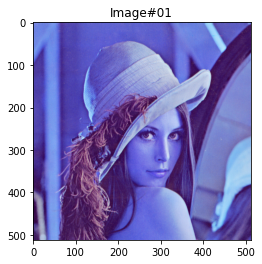

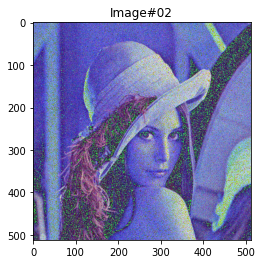

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.bmp')# My reference Image
image1=image
image2=gauss_noise_adder(image1)
plt.figure()
plt.title('Image#01')
plt.imshow(image1)
plt.figure()
plt.title('Image#02')
plt.imshow(image2)

In [ ]:
def mse(image1,image2):
    M = np.mean( (image1 - image2) ** 2 )
    return M

def psnr(image1,image2):
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(np.mean( (image1 - image2) ** 2 )))

In [ ]:
MSE=mse(image1,image2)
PSNR=psnr(image1,image2)
print("MSE of Image#01 and Image#02 is %1.0f" %MSE)
print("PSNR of Image#01 and Image#02 is %1.0f" %PSNR)

MSE of Image#01 and Image#02 is 94
PSNR of Image#01 and Image#02 is 28


Task#03

In [ ]:

def gauss_kernel(K,std):
    left_lim=-2
    right_lim=2
    delta=(right_lim-left_lim)/K
    x = np.arange(left_lim, right_lim, delta)
    y = np.arange(left_lim,right_lim, delta)
    x2d, y2d = np.meshgrid(x, y)
    gauss_kernel = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * std ** 2))
    norm_gauss_kernel = gauss_kernel / (2 * np.pi * std ** 2)      # normalized
    return norm_gauss_kernel


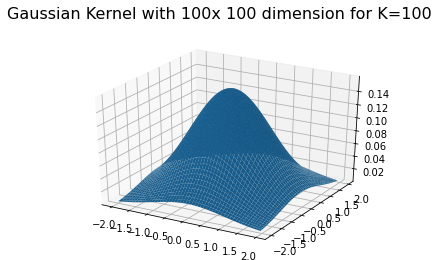

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
K=100
std=1
kernel=gauss_kernel(K,std)



row,col=kernel.shape
left_lim=-2
right_lim=2
delta=(right_lim-left_lim)/K
x = np.arange(left_lim, right_lim, delta)
y = np.arange(left_lim,right_lim, delta)
x2d, y2d = np.meshgrid(x, y)
fig = plt.figure()
fig.suptitle("Gaussian Kernel with %1.0f" %row +"x %1.0f" %col +" dimension for K=%1.0f"%K, fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2d, y2d, kernel)

Text#04

In [ ]:
def zero_pad(image,pad):
    row,col,ch=image.shape
    canvas = np.zeros((row+2*pad,col+2*pad,ch))
    rowp,colp,chp=canvas.shape
    canvas[pad:rowp-pad, pad:colp-pad]=image
    return canvas.astype(np.uint8)

def mirror_pad(image,pad):
  row,col,ch=image.shape
  canvas = np.zeros((row+2*pad,col+2*pad,ch))
  rowp,colp,chp=canvas.shape
  canvas[pad:rowp-pad, pad:colp-pad] = image

  canvas[0:pad,pad:colp-pad]=np.flip(image[1:pad+1,0:col])
  canvas[rowp-pad:rowp,pad:colp-pad]=np.flip(image[row-pad:row,0:col])
  # canvas[pad:rowp-pad,0:pad]=np.flip(image[0:row,0:pad])
  # canvas[pad:rowp-pad,colp-pad:colp]=np.flip(image[0:row,col-pad:col])
  canvas[:,0:pad]=np.flip(canvas[:,pad+2:(pad+2)+pad])
  canvas[:,colp-pad:colp]=np.flip(canvas[:,colp-(pad+1)-pad:colp-pad-1])
  
  return canvas.astype(np.uint8)
  
    

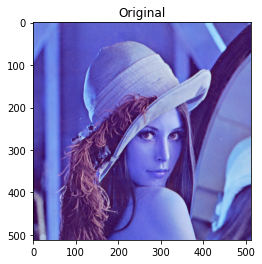

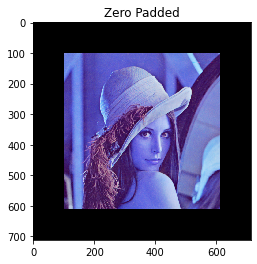

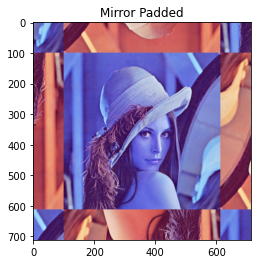

In [ ]:
import pylab as plt
import numpy as np
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.png')# My reference Image


pad=100
im_zeropadded=zero_pad(image,pad)
im_mirrorpadded=mirror_pad(image,pad)
plt.figure()
plt.title('Original')
plt.imshow(image.astype(np.uint8))
plt.figure()
plt.title('Zero Padded')
plt.imshow(im_zeropadded,cmap = 'gray',             #color map used to specify colors
           interpolation='nearest' )

plt.figure()
plt.title('Mirror Padded')
plt.imshow(im_mirrorpadded)

Task#05

In [ ]:
def RGBtoGRAY(image):
    return np.dot(image[...,:3], [0.3, 0.5, 0.2])


def gauss_noise_adder_greyscale(image):
      row,col= image.shape
      mean = 0                        # mean of noise
      var = 0.01
      sigma = var**0.5                # standard deviation of noise
      gaussian = np.random.normal(mean,sigma,(row,col))
      gauss = gaussian.reshape(row,col)
      A = np.double(image)
      out = np.zeros(A.shape, np.double)
      normalized = cv2.normalize(A, out, 1.0, 0.0, cv2.NORM_MINMAX)
      noise = normalized+gauss
      noise=(noise*255).astype(np.uint8)
      return noise


def convolve2D(image, kernel,padding=0):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) ) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding)) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by one pixel
        if y % 1 == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by one pixel
                    if x % 1 == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


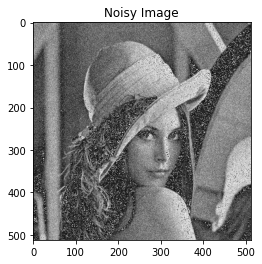

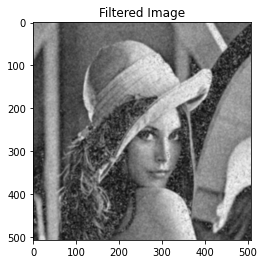

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lena.png')# My reference Image
image1=RGBtoGRAY(image)
image2=gauss_noise_adder_greyscale(image1)
K=6
std=1
padding=0
filter=gauss_kernel(K,std)
imagep=convolve2D(image2, filter,padding)
plt.figure()
plt.title('Noisy Image')
plt.imshow(image2, cmap=plt.get_cmap('gray'))
plt.figure()
plt.title('Filtered Image')
plt.imshow(imagep, cmap=plt.get_cmap('gray'))

In [ ]:

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!pip install nbconvert

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [ ]:

!jupyter nbconvert --to PDF "second_colab.ipynb"

[NbConvertApp] Converting notebook second_colab.ipynb to PDF
[NbConvertApp] Support files will be in second_colab_files/
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Making directory ./second_colab_files
[NbConvertApp] Writing 62306 bytes to ./notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('second_colab.ipynb')

In [ ]:
 jupyter nbconvert "second_colab.ipynb" --to pdf

SyntaxError: ignored